## Game of Thrones Universe

What started off as a series of books written by George R. R. Martin has now become a cultural phenomenon. Game of Thrones has taken the world by storm and ends its run as one of the most popular television shows of all time. It has attracted a record viewership on HBO and has a broad, active, and international fan base. Critics have praised the series for its acting, complex characters, story, scope, and production values.  
I am going to try and analyze the game of thrones universe through the various datasets present on the internet. Get ready, winter is coming...

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.patches as mpatches
sns.set_style("white")

We'll start with the general GOT dataset that I found on Kaggle. It has information about various battles that took place as well as character deaths throughout the series.

In [7]:
battles = pd.read_csv(r'D:\Purvi\Book-character-visualizations\game_of_thrones\DataExplorationDataset\battles.csv')
character_deaths = pd.read_csv(r'D:\Purvi\Book-character-visualizations\game_of_thrones\DataExplorationDataset\character-deaths.csv')

In [8]:
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [9]:
character_deaths.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),NaN,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


## Data Exploration

#### Major Deaths and Captures each year

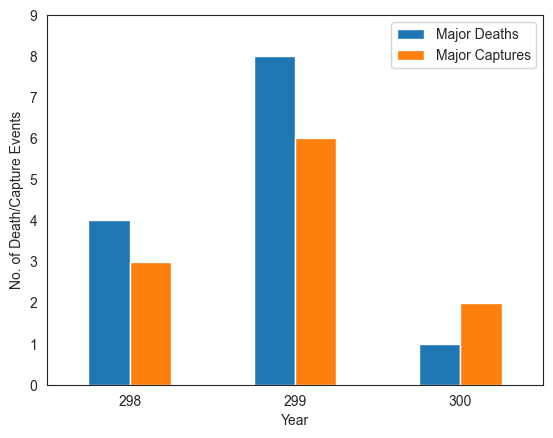

In [10]:
p = battles.groupby('year').sum()[["major_death", "major_capture"]].plot.bar(rot = 0)
_ = p.set(xlabel = "Year", ylabel = "No. of Death/Capture Events", ylim = (0, 9)), p.legend(["Major Deaths", "Major Captures"])

#### Impact of army size on battle outcome

This is a widely asked question. Did it matter how big the army was? Or was it simply the will power that guided the leading army to victory?

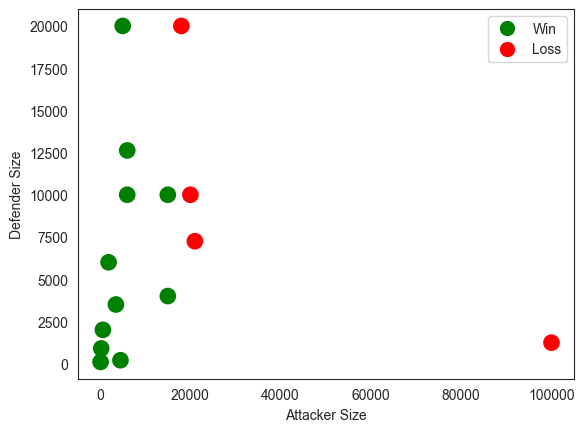

In [20]:
data = battles.dropna(axis = 0, subset = ["attacker_size", "defender_size", "attacker_outcome"]).copy(deep = True)
colors = ["green" if x == "win" else "red" for x in data.attacker_outcome.values]
p = data.plot.scatter("attacker_size", "defender_size", c = colors, s = 100, lw = 2.)
_ = p.set(xlabel = "Attacker Size", ylabel = "Defender Size")
# Add legend
win_patch = plt.Line2D([], [], marker="o", color="green", linestyle="", markersize=10, label="Win")
loss_patch = plt.Line2D([], [], marker="o", color="red", linestyle="", markersize=10, label="Loss")
p.legend(handles=[win_patch, loss_patch])

plt.show()

#### Which pairs fought the most?

Game of thrones is known for its epic battles. Let's found out which pair fought the most number of battles.

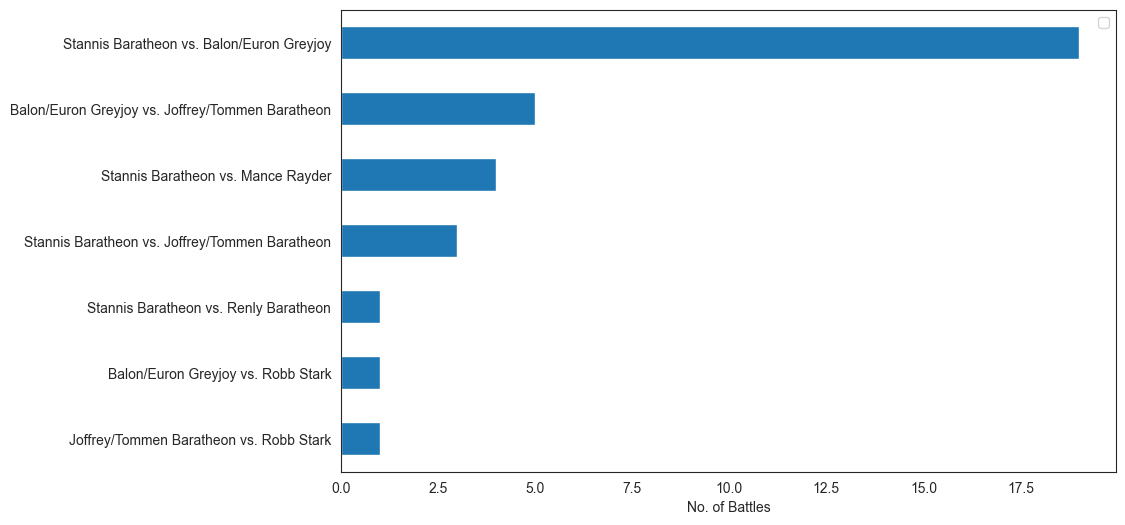

In [21]:
#Ignoring records where either attacker_king or defender_king is null. Also ignoring one record where both have the same value.
c = list(Counter([tuple(set(x)) for x in battles.dropna(subset = ["attacker_king", "defender_king"])[["attacker_king", "defender_king"]].values if len(set(x)) > 1]).items())
p = pd.DataFrame(c).sort_values(1).plot.barh(figsize = (10, 6))
_ = p.set(yticklabels = ["%s vs. %s" % (x[0], x[1]) for x in list(zip(*c))[0]], xlabel = "No. of Battles"), p.legend("")

#### Which region saw the most number of tragedies?

Game of thrones is known for its rich cultural and geographical diversity. However, there are certain parts of this universe which may have been beautiful, but have also seen a lot of deaths, captures and battles.

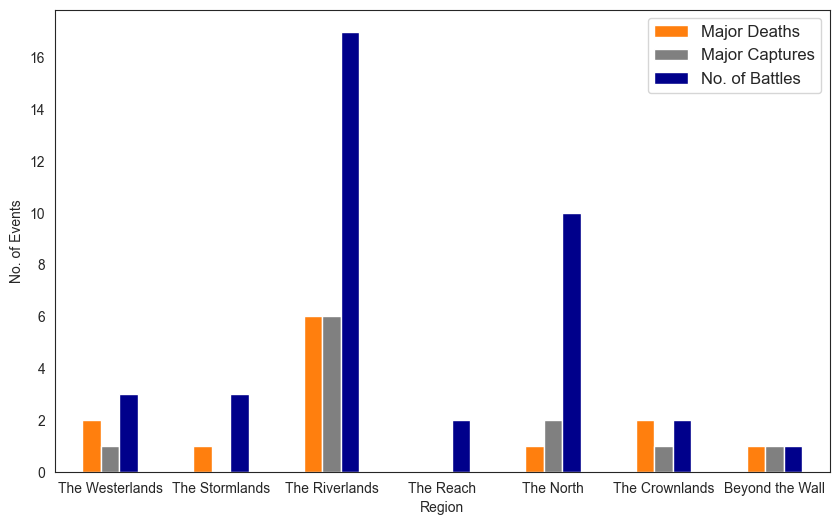

In [24]:
data = battles.groupby("region").sum()[["major_death", "major_capture"]]
p = pd.concat([data, battles.region.value_counts().to_frame()], axis = 1).sort_values("region", ascending = False).copy(deep = True).plot.bar(color = [sns.color_palette()[1], "grey", "darkblue"], rot = 0, figsize=(10, 6))
_ = p.set(xlabel = "Region", ylabel = "No. of Events"), p.legend(["Major Deaths", "Major Captures", "No. of Battles"], fontsize = 12.)

# Visualizing the Game Of Thrones Universe 

Now that we have answered some fundamental questions about the series let's look at my favourite part, analysing the various character relationships throughout the series.

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
book1 = pd.read_csv('book1.csv')
book1.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


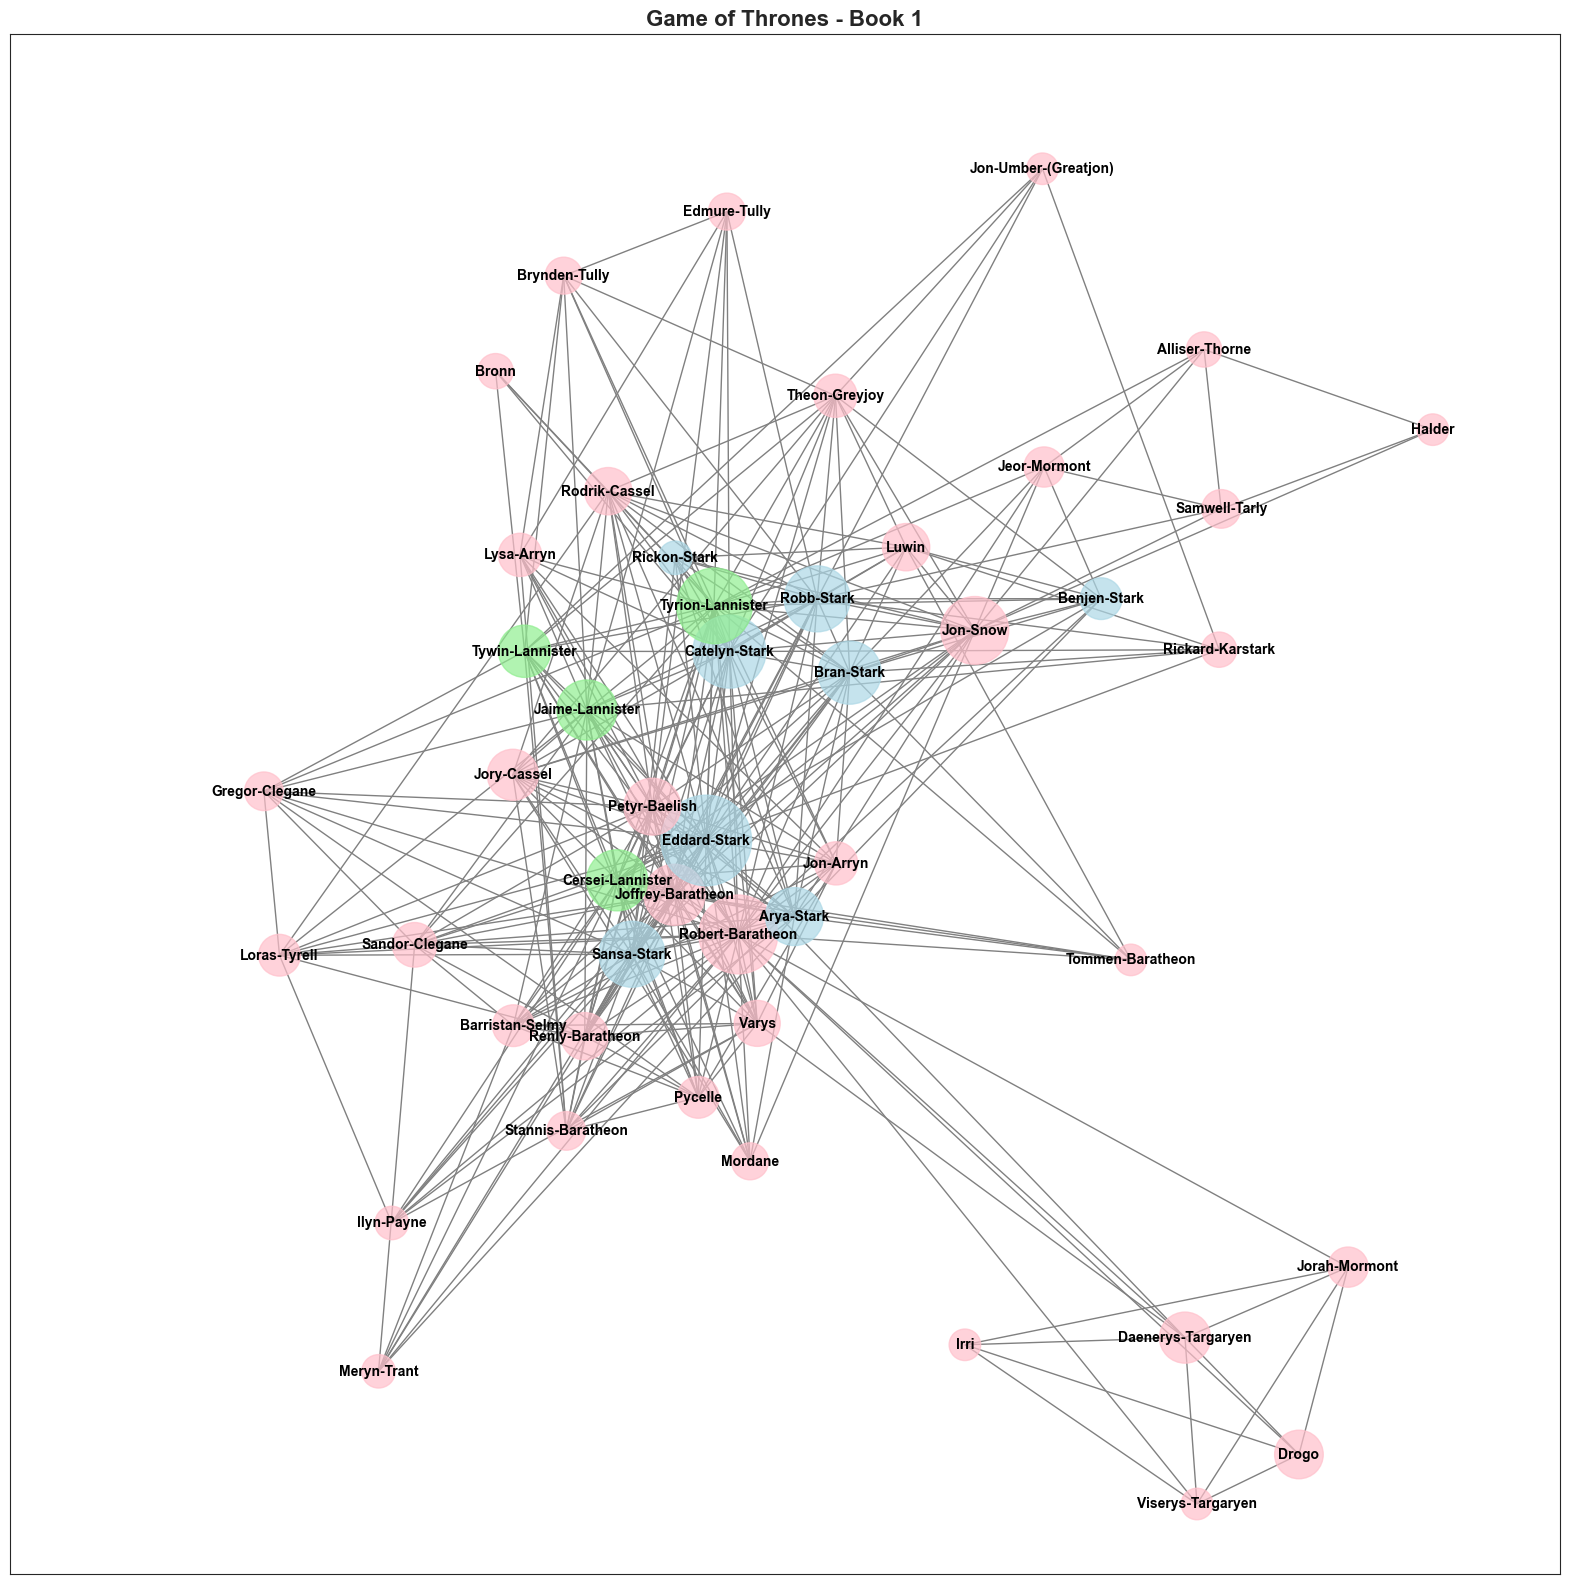

In [30]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Reading in datasets/book1.csv
book1 = pd.read_csv(r'D:\Purvi\Book-character-visualizations\game_of_thrones\NetworkDataset\book1.csv')

# Creating an empty graph object
G_book1 = nx.Graph()

# Iterating through the DataFrame to add edges
for _, edge in book1.iterrows():
    G_book1.add_edge(edge['Source'], edge['Target'], weight=edge['weight']*5)

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G_book1)

# Set threshold for degree centrality
threshold = 0.04

# Get nodes to keep
nodes_to_keep = [n for n in G_book1.nodes() if degree_centrality[n] >= threshold]

# Create subgraph with only selected nodes
G_book1_sub = G_book1.subgraph(nodes_to_keep)

# Define node sizes and colors
node_sizes = [degree_centrality[n] * 12000 for n in G_book1_sub.nodes()]
node_colors = ['lightblue' if 'Stark' in n else 'lightgreen' if 'Lannister' in n else 'pink' for n in G_book1_sub.nodes()]

# Define edge colors and widths
edge_colors = ['grey' for u, v, d in G_book1_sub.edges(data=True)]

# Create plot figure
fig, ax = plt.subplots(figsize=(20, 20))

# Draw nodes and edges
pos = nx.spring_layout(G_book1_sub, k=2.2)
nx.draw_networkx_nodes(G_book1_sub, pos, node_size=node_sizes, node_color=node_colors, alpha=0.7)
nx.draw_networkx_edges(G_book1_sub, pos, edge_color=edge_colors)

# Add node labels
node_labels = {n: n.split(' ')[-1] for n in G_book1_sub.nodes()}
nx.draw_networkx_labels(G_book1_sub, pos, labels=node_labels, font_size=10, font_weight='bold')

# Set plot limits and remove axes
ax.set_xlim(-1.1,1.1)
ax.set_ylim(-1.1,1.1)
ax.set_xticks([])
ax.set_yticks([])

# Add plot title
plt.title("Game of Thrones - Book 1", fontsize=16, fontweight='bold')

# Show plot
plt.show()


# Most Important Characters

In [34]:
# Iterating through the DataFrame to add edges
for _, edge in book1.iterrows():
    G_book1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

# Creating a list of networks for all the books
books = [G_book1]
book_fnames = [r'D:\Purvi\Book-character-visualizations\game_of_thrones\NetworkDataset\book2.csv', r'D:\Purvi\Book-character-visualizations\game_of_thrones\NetworkDataset\book3.csv', r'D:\Purvi\Book-character-visualizations\game_of_thrones\NetworkDataset\book4.csv', r'D:\Purvi\Book-character-visualizations\game_of_thrones\NetworkDataset\book5.csv']
for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    books.append(G_book)

In [35]:
# Calculating the degree centrality of book 1
deg_cen_book1 = nx.degree_centrality(books[0])

# Calculating the degree centrality of book 5
deg_cen_book5 = nx.degree_centrality(books[4])

# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book1 =  sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:10]

# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book5 =  sorted(deg_cen_book5.items(), key=lambda x:x[1], reverse=True)[0:10]

# Printing out the top 10 of book1 and book5
print(sorted_deg_cen_book1)
print(sorted_deg_cen_book5)

[('Eddard-Stark', 0.3548387096774194), ('Robert-Baratheon', 0.2688172043010753), ('Tyrion-Lannister', 0.24731182795698928), ('Catelyn-Stark', 0.23118279569892475), ('Jon-Snow', 0.19892473118279572), ('Robb-Stark', 0.18817204301075272), ('Sansa-Stark', 0.18817204301075272), ('Bran-Stark', 0.17204301075268819), ('Cersei-Lannister', 0.16129032258064518), ('Joffrey-Baratheon', 0.16129032258064518)]
[('Jon-Snow', 0.1962025316455696), ('Daenerys-Targaryen', 0.18354430379746836), ('Stannis-Baratheon', 0.14873417721518986), ('Tyrion-Lannister', 0.10443037974683544), ('Theon-Greyjoy', 0.10443037974683544), ('Cersei-Lannister', 0.08860759493670886), ('Barristan-Selmy', 0.07911392405063292), ('Hizdahr-zo-Loraq', 0.06962025316455696), ('Asha-Greyjoy', 0.056962025316455694), ('Melisandre', 0.05379746835443038)]


## The evolution of character importance
<p>According to degree centrality, the most important character in the first book is Eddard Stark but he is not even in the top 10 of the fifth book. The importance of characters changes over the course of five books because, you know, stuff happens... ;)</p>
<p>Let's look at the evolution of degree centrality of a couple of characters like Eddard Stark, Jon Snow, and Tyrion, which showed up in the top 10 of degree centrality in the first book.</p>

<AxesSubplot:>

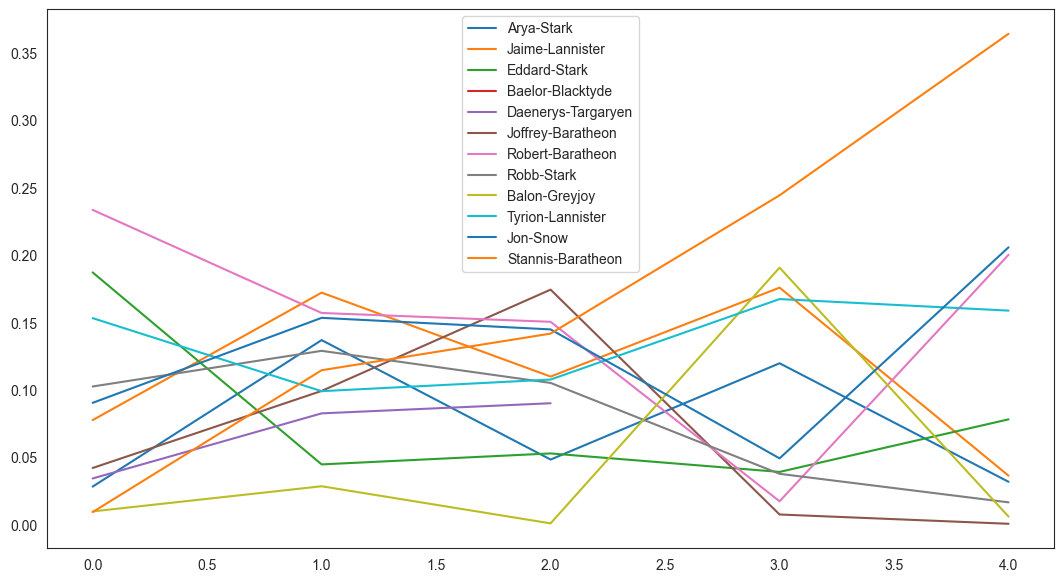

In [36]:
# Creating a list of betweenness centrality of all the books just like we did for degree centrality
evol = [nx.betweenness_centrality(book, weight='weight') for book in books]

# Making a DataFrame from the list
betweenness_evol_df = pd.DataFrame.from_records(evol)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(betweenness_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the evolution of the top characters
betweenness_evol_df[list_of_char].plot(figsize=(13, 7))